<a href="https://colab.research.google.com/github/robhertel/ESOF-4011/blob/main/Lab1_Uniform_Cost_Search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.educative.io/edpresso/what-is-the-python-priority-queue

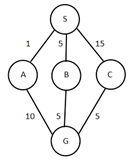

In [1]:
from queue import Queue, PriorityQueue

In [2]:
def ucs_weight(from_node, to_node, weights=None):
    """
    Returns the UCS weight for a edge between from and to
    Assumption: There is no edge with weight >= 10e100 (You can change it)
    :param from_node: The node edge starts from
    :param to_node: The node edge ends to
    :param weights: Dictionary of weights; maps `(from, to) -> weight`
    :return: Returns the weight of edge between from and to.
    """
    return weights.get((from_node, to_node), 10e100) if weights else 1

In [3]:
def ucs(graph, start, end, weights=None):
    """
    Function to compute UCS(Uniform Cost Search) for a graph
    :param graph: The graph to compute UCS for
    :param start: start node
    :param end: end node
    :param weights: A dictionary of weights; maps (start_node, end_node) -> weight
    """
    frontier = PriorityQueue()
    frontier.put((0, start))  # (priority, node)
    explored = []

    while True:
        if frontier.empty():
            raise Exception("No way Exception")

        ucs_w, current_node = frontier.get()
        print (ucs_w)
        print (current_node)
        explored.append(current_node)
        print (explored)
        if current_node == end:
            return

        for node in graph[current_node]:
            if node not in explored:
                frontier.put((
                    ucs_w + ucs_weight(current_node, node, weights),
                    node
                ))

In [4]:
ucs_test_graph = {
     'S': ['A', 'B', 'C'],
     'A': ['S', 'G'],
     'B': ['S', 'G'],
     'C': ['S', 'G'],
     'G': ['A', 'B', 'C']
 }

In [5]:
 ucs_test_weight = {
     ('S', 'A'): 1,
     ('S', 'B'): 5,
     ('S', 'C'): 15,

     ('A', 'G'): 10,
     ('A', 'S'): 1,

     ('B', 'S'): 5,
     ('B', 'G'): 5,

     ('C', 'S'): 15,
     ('C', 'G'): 5,

     ('G', 'A'): 10,
     ('G', 'B'): 5,
     ('G', 'C'): 5,
 }

In [6]:
ucs(ucs_test_graph, 'S', 'G', ucs_test_weight)

0
S
['S']
1
A
['S', 'A']
5
B
['S', 'A', 'B']
10
G
['S', 'A', 'B', 'G']
